In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn
import tensorflow

## 1. 数据读取与处理

### 1.1 数据导入

In [2]:
data = pd.read_csv("C:/Users/jay/AAPL_2010_to_2024_daily.csv", index_col=0)

In [3]:
print(data.index.dtype)  # 应该输出：datetime64[ns]

object


In [4]:
# 调整日期的索引格式，应该输出：datatime64[ns]
data.index = pd.to_datetime(data.index, format="%Y/%m/%d")
print(data.index.dtype) 

datetime64[ns]


In [5]:
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,6.440330,6.455076,6.391278,6.422876,493729600
2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800
2010-01-06,6.348848,6.477047,6.342227,6.451467,552160000
2010-01-07,6.337110,6.379843,6.291067,6.372319,477131200
2010-01-08,6.379241,6.379844,6.291369,6.328684,447610800


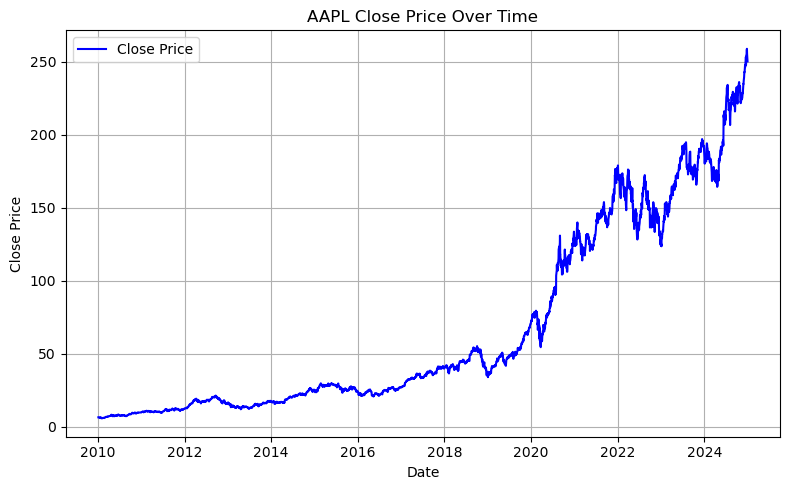

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.title('AAPL Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### 1.2 构建X，y

In [7]:
# 添加列 (future_returns) 来计算股价变化的百分比
data['future_returns'] = data['Close'].pct_change().shift(-1)
# 添加列 (signal)
data['signal'] = np.where(data['future_returns'] > 0, 1, 0)

In [8]:
# 核实（future_return）、（signal）是否准确添加
data[['Close', 'future_returns', 'signal']].head()

,Close,future_returns,signal
Date,,,
2010-01-04,6.440330,0.001729,1
2010-01-05,6.451466,-0.015906,0
2010-01-06,6.348848,-0.001849,0
2010-01-07,6.337110,0.006648,1
2010-01-08,6.379241,-0.008822,0


In [9]:
# 添加列 (pct_change) 1天为单位
data['pct_change'] = data['Close'].pct_change()
# 添加列 (pct_change2) 2天为单位
data['pct_change2'] = data['Close'].pct_change(2)
# 添加列 (pct_change5) 5天为单位
data['pct_change5'] = data['Close'].pct_change(5)

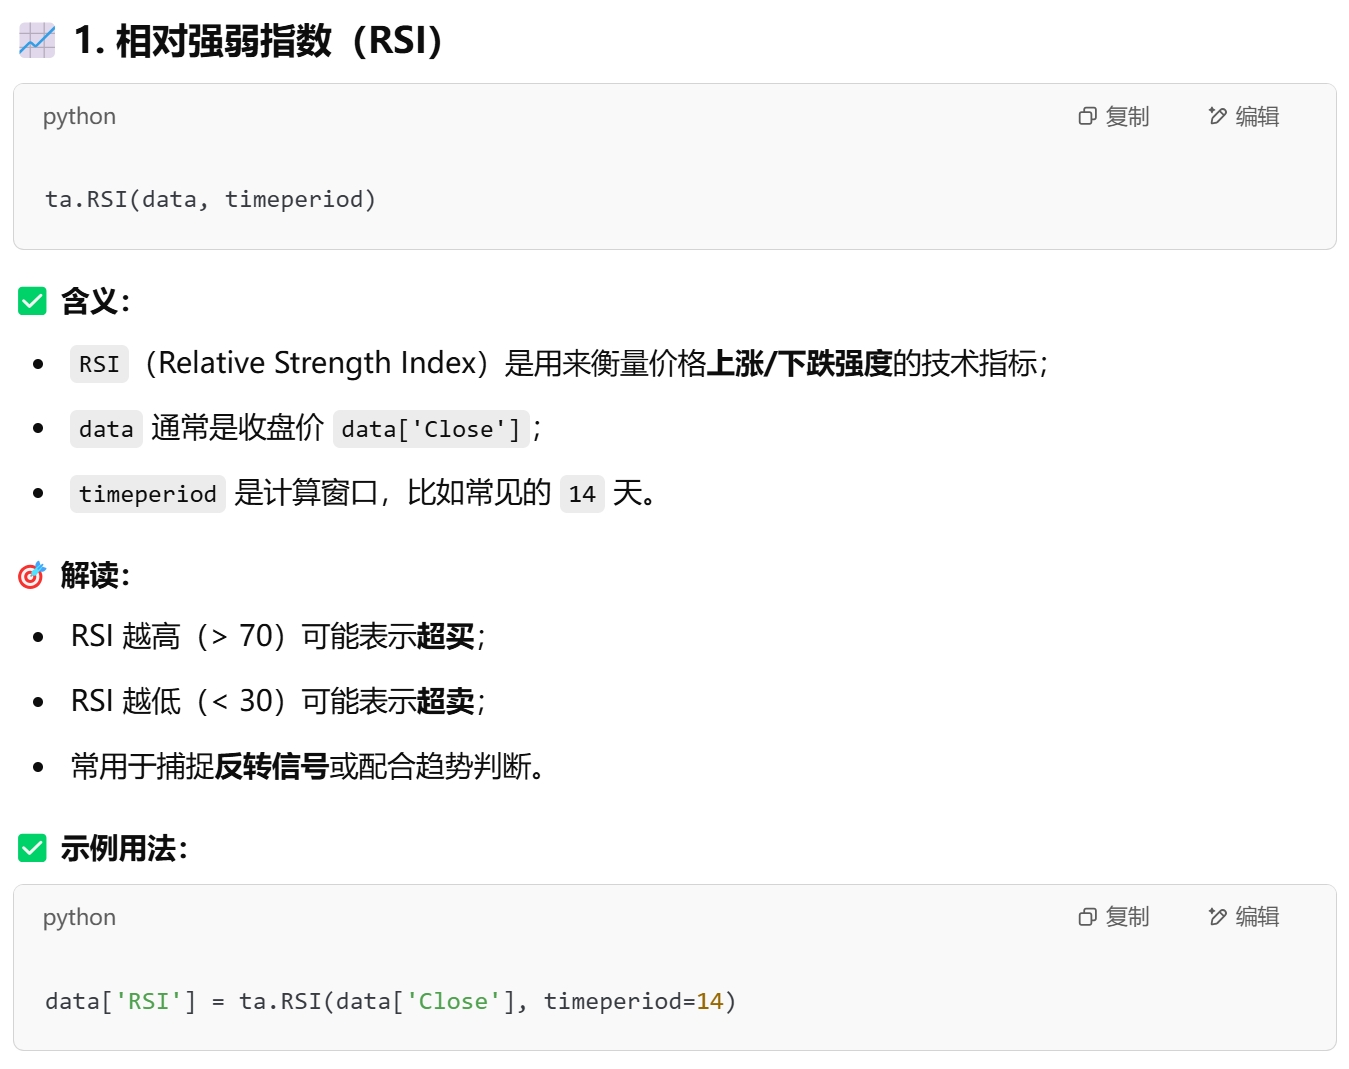

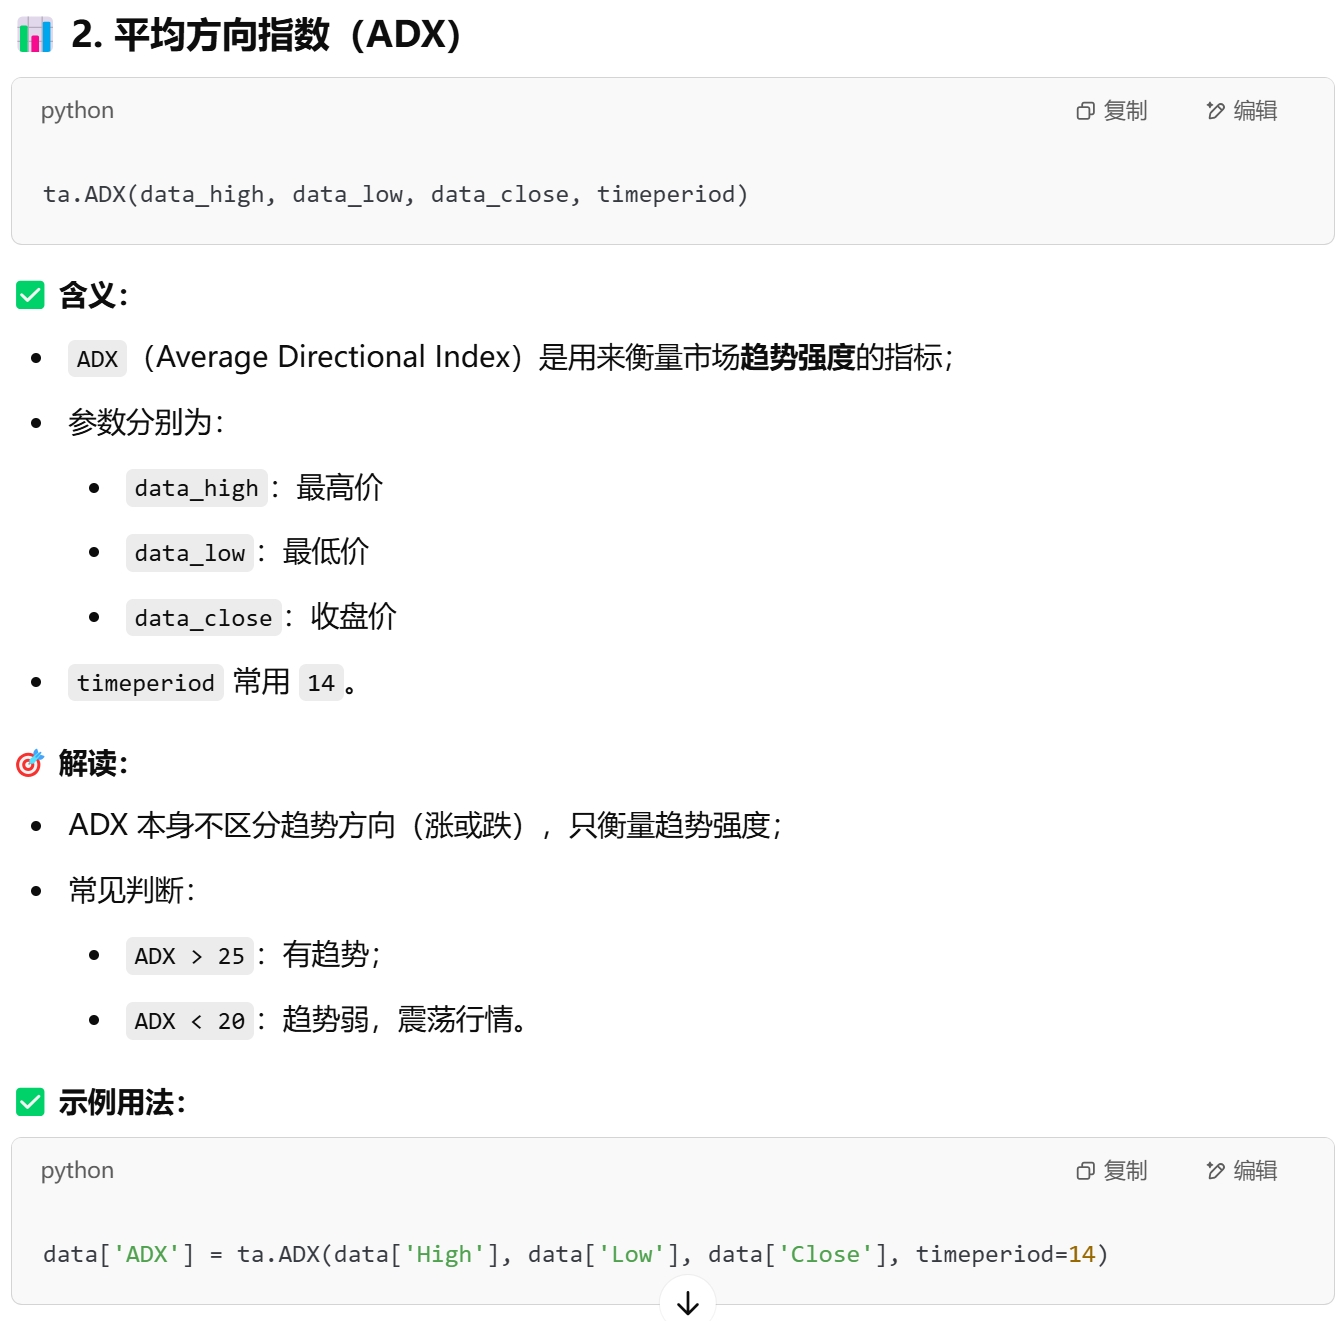

In [10]:
# 创建技术指标 RSI 和 ADX
import talib as ta
# 添加列 （RSI）
data['rsi'] = ta.RSI(data['Close'].values, timeperiod=5)
# 添加列 （ADX）
data['adx'] = ta.ADX(data['High'].values, data['Low'].values, data['Open'].values, timeperiod=5)

In [11]:
# 添加列：简单移动平均（SMA）
data['sma'] = data['Close'].rolling(window=5).mean()
# 添加列：滚动相关系数（Rolling Correlation）
data['corr'] = data['Close'].rolling(window=5).corr(data['sma'])

In [12]:
# 添加列：5-day volatility
data['volatility5'] = data['Close'].pct_change().rolling(window=5).std()*100
# 添加列：8-day volatility
data['volatility10'] = data['Close'].pct_change().rolling(window=10).std()*100

In [13]:
data.head(20)

,Close,High,Low,Open,Volume,future_returns,signal,pct_change,pct_change2,pct_change5,rsi,adx,sma,corr,volatility5,volatility10
Date,,,,,,,,,,,,,,,,
2010-01-04,6.440330,6.455076,6.391278,6.422876,493729600,0.001729,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,6.451466,6.487879,6.417460,6.458087,601904800,-0.015906,0,0.001729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,6.348848,6.477047,6.342227,6.451467,552160000,-0.001849,0,-0.015906,-0.014205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,6.337110,6.379843,6.291067,6.372319,477131200,0.006648,1,-0.001849,-0.017726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,6.379241,6.379844,6.291369,6.328684,447610800,-0.008822,0,0.006648,0.004787,NaN,NaN,NaN,6.391399,NaN,NaN,NaN
2010-01-11,6.322965,6.409935,6.273009,6.403916,462229600,-0.011375,0,-0.008822,-0.002232,-0.018223,23.790874,NaN,6.367926,NaN,0.887690,NaN
2010-01-12,6.251040,6.312732,6.211919,6.295277,594459600,0.014106,1,-0.011375,-0.020097,-0.031067,16.974737,NaN,6.327841,NaN,0.882982,NaN
2010-01-13,6.339216,6.347642,6.142103,6.255556,605892000,-0.005792,0,0.014106,0.002570,-0.001517,42.305195,NaN,6.325914,NaN,1.064752,NaN
2010-01-14,6.302501,6.333498,6.290163,6.322965,432894000,-0.016712,0,-0.005792,0.008232,-0.005461,36.507978,NaN,6.318993,0.684406,1.093684,NaN


In [14]:
# 删除遗失的变量
data.dropna(inplace = True)

In [15]:
data.head()

,Close,High,Low,Open,Volume,future_returns,signal,pct_change,pct_change2,pct_change5,rsi,adx,sma,corr,volatility5,volatility10
Date,,,,,,,,,,,,,,,,
2010-01-19,6.471328,6.475842,6.236598,6.269400,730007600,-0.015392,0,0.044239,0.026787,0.023464,63.552121,50.106440,6.312252,0.362485,2.489249,1.818354
2010-01-20,6.371718,6.486675,6.304609,6.467415,612152800,-0.017287,0,-0.015392,0.028165,0.019305,51.460100,42.002609,6.336387,0.589957,2.560353,1.886164
2010-01-21,6.261573,6.419264,6.235693,6.382249,608154400,-0.049598,0,-0.017287,-0.032413,-0.012248,40.744613,40.183873,6.320859,0.511888,2.637085,1.898679
2010-01-22,5.951009,6.244421,5.933254,6.222754,881767600,0.026903,1,-0.049598,-0.066028,-0.055770,23.498815,46.590891,6.250560,0.856195,3.403149,2.439539
2010-01-25,6.111106,6.160158,6.024436,6.094254,1065699600,0.014133,1,0.026903,-0.024030,-0.013888,39.892724,51.716505,6.233347,0.809880,3.758906,2.632642


In [16]:
# 构建 X, y 
# 因变量 y
y = data[['signal']].copy()

In [17]:
# 自变量 X （features）
X = data.drop(['signal', 'future_returns'], axis=1)

In [18]:
X.shape

(3763, 14)

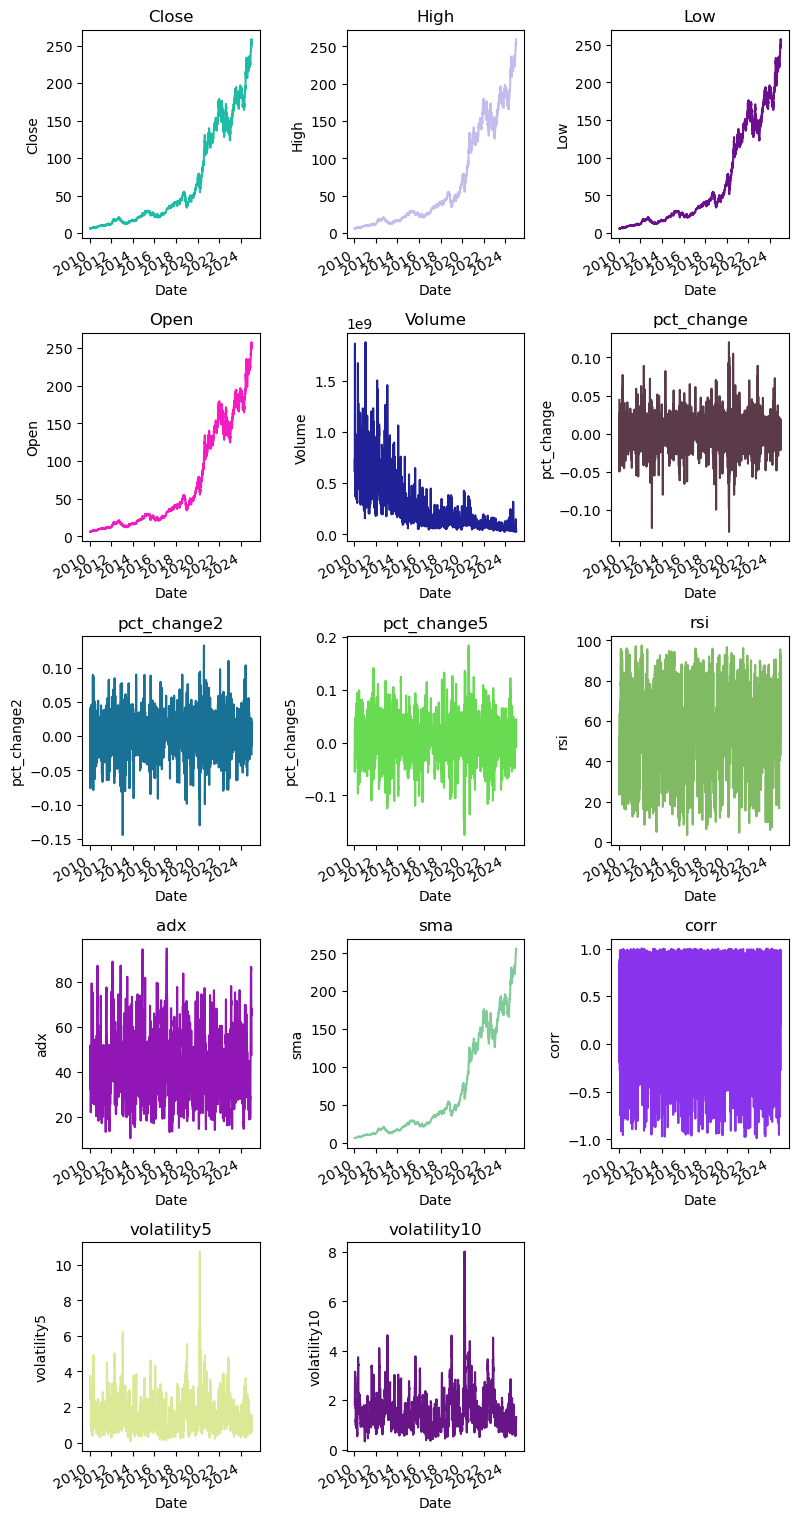

In [19]:
i = 1
nrows = int(X.shape[1]+1/3)
for feature in X.columns:
    plt.subplot(nrows, 3, i)
    X[feature].plot(figsize=(8, 3*X.shape[1]), color=np.random.rand(3,))
    plt.ylabel(feature)
    plt.title(feature)
    i += 1
plt.tight_layout()
plt.show()

In [20]:
# 稳定性检验（stationarity check）
# 使用 adfuller method, 如果 p-value<=0.05,拒绝原假设H0；如果 p-value>0.05,接受原假设H0,特征不平稳

def stationary(series):
    """ 定义一个函数，判断特征是否平稳 """
    result = adfuller(series)
    if(result[1] < 0.05):
        return 'stationary'
    else:
        return 'not stationary'

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
# 检查自变量 X 中各个特征的平稳性
for col in X.columns:
    if stationary(data[col]) == 'not stationary':
        print('%s is not stationary. Dropping it.' % col)
        X.drop(columns=[col], axis=1, inplace=True)

Close is not stationary. Dropping it.
High is not stationary. Dropping it.
Low is not stationary. Dropping it.
Open is not stationary. Dropping it.
sma is not stationary. Dropping it.


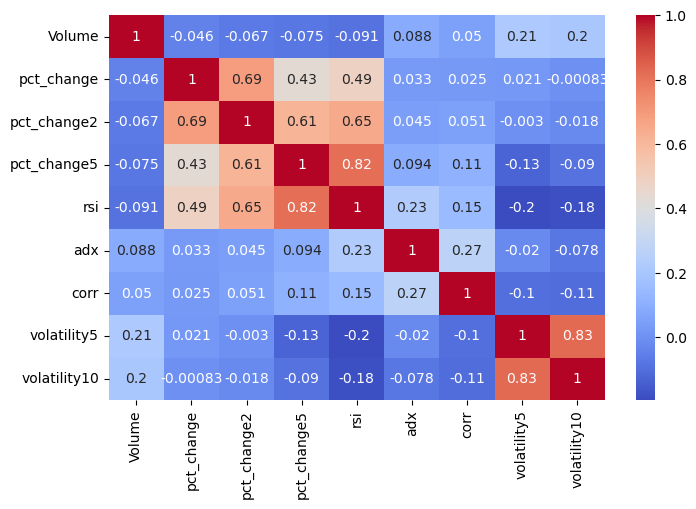

In [23]:
# 相关性（correlation）检测
# 如果两个特征具有高度的相关性，则其中一个特征是冗余的，我们可以移除一个特征，来提高模型的学习性能
# 通常我们将临界点设为0.7-0.8， 这里以0.7为参照

import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()

In [24]:
# 查看自变量间的相关性
# 取绝对值的相关系数矩阵
corr_matrix = X.corr().abs()

# 只取上三角部分（避免重复）
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 筛选出高相关性的特征对
high_corr = upper.stack()[upper.stack() > 0.7]
print(high_corr)

pct_change5  rsi             0.815619
volatility5  volatility10    0.830533
dtype: float64


In [25]:
# 这一步我们将自动删除自变量 X 中高度相关的特征列（相关性 > 0.7）中的一个，默认保留排在前面的那个：

# 找出高度相关的列名集合（>0.7）
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# 打印要删除的列
print("将要删除的列：", to_drop)

# 删除高度相关的列
X_filtered = X.drop(columns=to_drop)

# 查看过滤后的结果
print("原始列数：", X.shape[1])
print("过滤后列数：", X_filtered.shape[1])

将要删除的列： ['rsi', 'volatility10']
原始列数： 9
过滤后列数： 7


In [26]:
X = X_filtered

In [27]:
list(X.columns)

['Volume',
 'pct_change',
 'pct_change2',
 'pct_change5',
 'adx',
 'corr',
 'volatility5']

In [28]:
list(y.columns)

['signal']

### 1.3 划分训练集和测试集（train and test split）

In [29]:
from sklearn.model_selection import train_test_split
# 注意 shuffle=False, 我们在处理时间序列，样本occur one after the other(in sequence), 所以样本不可随机分配
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, shuffle=False)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(3763, 7) (3010, 7) (753, 7)


In [31]:
print(y.shape, y_train.shape, y_test.shape)

(3763, 1) (3010, 1) (753, 1)


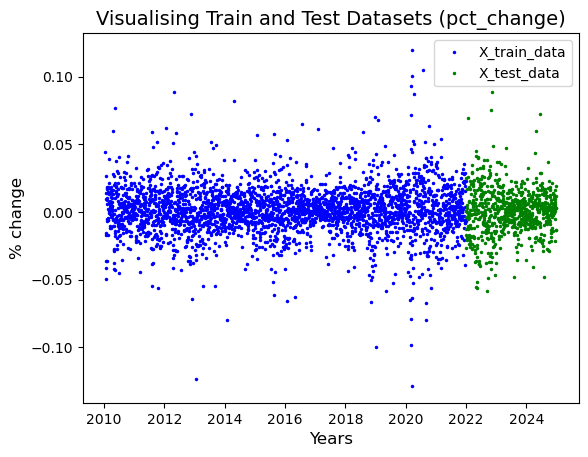

In [32]:
# 通过图表查看训练集和测试集的划分是否合理
plt.plot(X_train['pct_change'], linestyle='None', marker='.', markersize=3.0, 
         label='X_train_data', color='blue')
plt.plot(X_test['pct_change'], linestyle='None', marker='.', markersize=3.0, 
         label='X_test_data', color='green')
plt.title("Visualising Train and Test Datasets (pct_change)", fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('% change', fontsize=12)
plt.legend()
plt.show()

In [33]:
# 数据缩放，因为自变量之间的数字差距较大，会影响逻辑回归、支持向量机和神经网络对各个变量赋予的权重值
# 决策树、随机森林、XGboost 等树模型一般不太需要数据缩放
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
# 注意测试集不可以 fit_transform
X_test_scaled = sc.transform(X_test)

## 2. Logistic Regression

### 2.1 模型构建与评价

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [35]:
model = LogisticRegression()
model = model.fit(X_train_scaled, y_train)

In [36]:
y_pred = model.predict(X_test_scaled)

In [37]:
# 利用 confusion_matrix, classification_report 对模型预测结果进行评价
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
confusion_matrix_data = confusion_matrix(y_test.values, y_pred)

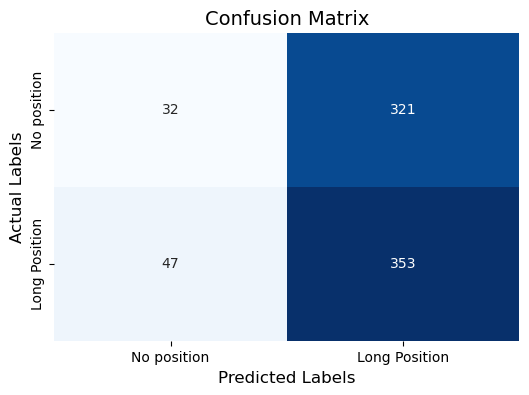

In [39]:
import seaborn as sns
# 混淆矩阵（confusion_matrix）
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(confusion_matrix_data, fmt="d", cmap='Blues', cbar=False, annot=True, ax=ax)
ax.set_xlabel('Predicted Labels', fontsize=12)
ax.set_ylabel('Actual Labels', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)
ax.xaxis.set_ticklabels(['No position', 'Long Position'])
ax.yaxis.set_ticklabels(['No position', 'Long Position'])
plt.show()

In [40]:
print(classification_report(y_test.values, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.09      0.15       353
           1       0.52      0.88      0.66       400

    accuracy                           0.51       753
   macro avg       0.46      0.49      0.40       753
weighted avg       0.47      0.51      0.42       753



In [96]:
# 预测test集的概率值 y_pred_test
y_test_proba = model.predict_proba(X_test_scaled)[:, 1]
# 设置找到的最佳阈值
best_threshold = 0.53
# 根据阈值进行预测：大于等于阈值的判为1类（破产），否则为0类
y_test_pred = (y_test_proba >= best_threshold).astype(int)
# 查看评估结果
print(classification_report(y_test.values, y_test_pred))
# 查看预测结果可知，虽然整体 f1-score 较高，但是对1类（破产）的预测效果很差，模型不适用
# 可以做为后续机器模型的对比标准

              precision    recall  f1-score   support

           0       0.44      0.39      0.41       353
           1       0.51      0.55      0.53       400

    accuracy                           0.48       753
   macro avg       0.47      0.47      0.47       753
weighted avg       0.47      0.48      0.47       753



### 2.2 策略构建与回测

In [98]:
strategy_data = X_test[['pct_change']].copy()
strategy_data['predicted_signal'] = y_test_pred
strategy_data['strategy_returns'] = strategy_data['predicted_signal'].shift(1)*\
strategy_data['pct_change']

In [99]:
strategy_data.dropna(inplace=True)

In [100]:
strategy_data.head()

,pct_change,predicted_signal,strategy_returns
Date,,,
2022-01-03,0.025004,0,0.000000
2022-01-04,-0.012692,1,-0.000000
2022-01-05,-0.026600,1,-0.026600
2022-01-06,-0.016693,1,-0.016693
2022-01-07,0.000988,0,0.000988


In [44]:
# 计算累计收益（cumulative returns）
strategy_data['cumulative_returns'] = (1 + strategy_data['strategy_returns']).cumprod()

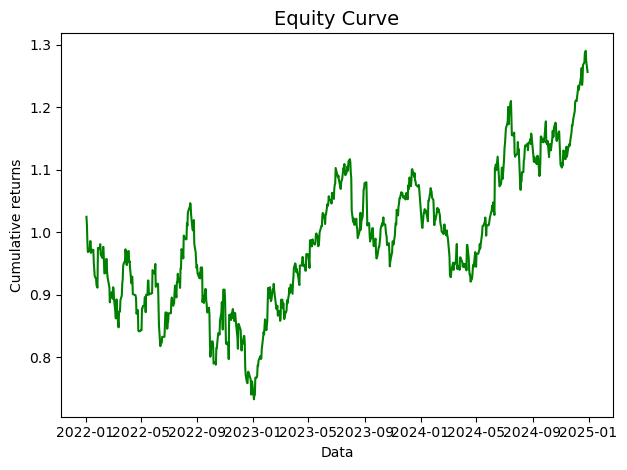

In [45]:
# 用图像表示累积收益
plt.plot(figsize=(8,5))
plt.plot(strategy_data.index, strategy_data['cumulative_returns'], color='green')
plt.title('Equity Curve', fontsize=14)
plt.xlabel('Data')
plt.ylabel('Cumulative returns')
plt.tight_layout()
plt.show()

In [46]:
# 计算策略运行时的最大值（Running Maximum）
running_max = np.maximum.accumulate(strategy_data['cumulative_returns'].dropna())
#  确保最大值不低于 1
running_max[running_max < 1] = 1

$$
\text{Drawdown} = \left( \frac{\text{Cumulative Returns}}{\text{Running Maximum}} - 1 \right) \times 100
$$

回撤（Drawdown）公式说明：  
Cumulative Returns 表示当前时刻的累计回报。  
Running Maximum 表示当前时刻的历史最高累计回报。

In [47]:
# 计算回撤（Drawdown）
drawdown = ((strategy_data['cumulative_returns'])/running_max -1)*100
# 计算最大回撤（Maximum Drawdown）
max_dd = drawdown.min()
print("The maximum drawdown is {0: .2f}%." .format(max_dd))

The maximum drawdown is -29.99%.


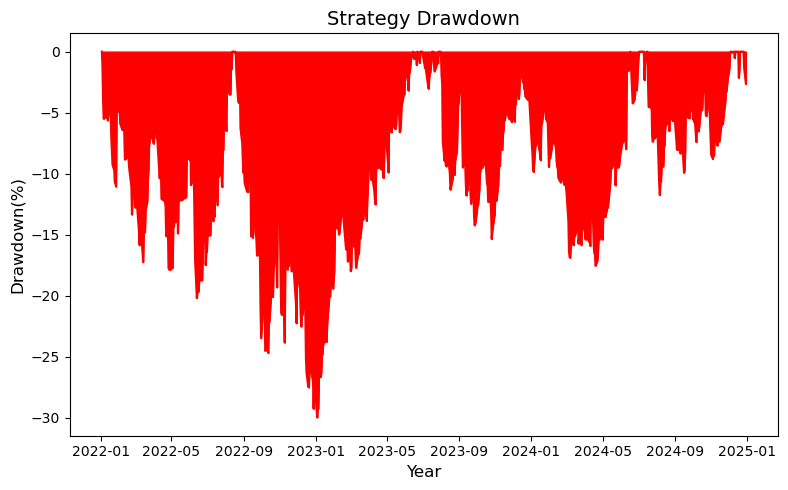

In [48]:
fig = plt.figure(figsize=(8, 5))
plt.plot(drawdown, color='red')
plt.fill_between(drawdown.index, drawdown.values, color='red')
plt.title('Strategy Drawdown', fontsize=14)
plt.ylabel('Drawdown(%)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.tight_layout()
plt.show()

In [49]:
# 计算夏普比率（sharp ratio），此处忽略无风险收益率
sharpe_ratio = round(strategy_data['strategy_returns'].mean()/
                     strategy_data['strategy_returns'].std()*np.sqrt(252*6.5*4), 2)
print("The sharpe ratio in logistic regression is {0: .2f}." .format(sharpe_ratio))

The sharpe ratio in logistic regression is  2.20.


## 3. Naive bayes model

### 3.1 模型构建与评价

In [50]:
from sklearn.naive_bayes import BernoulliNB
model2 = BernoulliNB()
model2.fit(X_train, y_train)

BernoulliNB()

In [51]:
y_pred2 = model2.predict(X_test)

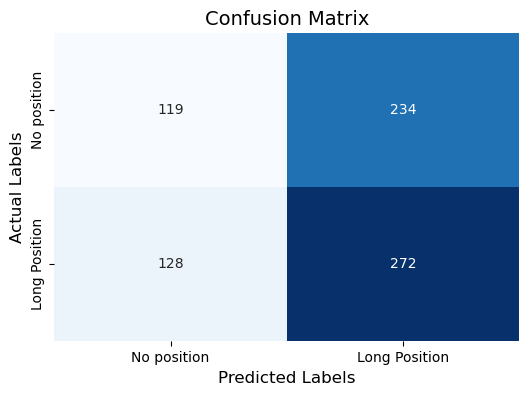

In [52]:
confusion_matrix_data = confusion_matrix(y_test.values, y_pred2)
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(confusion_matrix_data, fmt="d", cmap='Blues', cbar=False, annot=True, ax=ax)
ax.set_xlabel('Predicted Labels', fontsize=12)
ax.set_ylabel('Actual Labels', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)
ax.xaxis.set_ticklabels(['No position', 'Long Position'])
ax.yaxis.set_ticklabels(['No position', 'Long Position'])
plt.show()

In [53]:
print(classification_report(y_test.values, y_pred2))

              precision    recall  f1-score   support

           0       0.48      0.34      0.40       353
           1       0.54      0.68      0.60       400

    accuracy                           0.52       753
   macro avg       0.51      0.51      0.50       753
weighted avg       0.51      0.52      0.50       753



### 3.2 策略构建与回测

In [54]:
strategy_data2 = X_test[['pct_change']].copy()
strategy_data2['predicted_signal'] = model2.predict(X_test)

# 计算策略收益（strategy returns）
strategy_data2['strategy_returns'] = strategy_data2['predicted_signal'].shift(1)*\
strategy_data2['pct_change']
strategy_data2.dropna(inplace=True)

# 计算累计收益（cumulative returns）
strategy_data2['cumulative_returns'] = (1 + strategy_data2['strategy_returns']).cumprod()

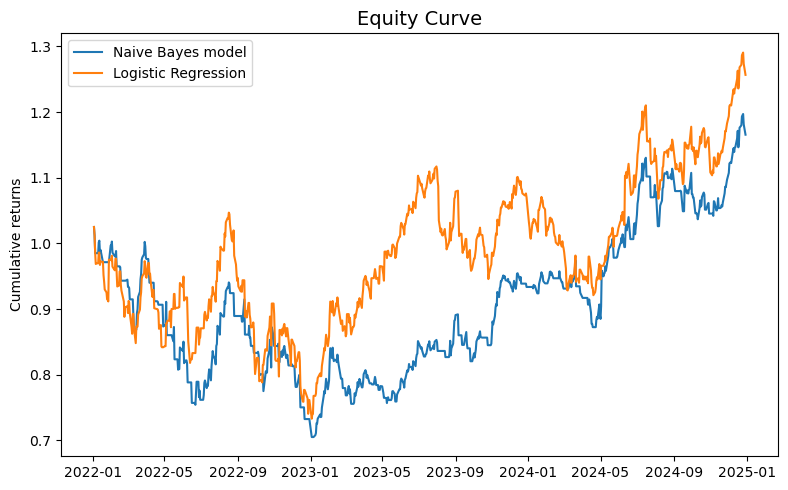

In [55]:
plt.figure(figsize=(8, 5))
plt.plot(strategy_data2['cumulative_returns'], label='Naive Bayes model')
plt.plot(strategy_data['cumulative_returns'], label='Logistic Regression')
plt.title('Equity Curve', fontsize=14)
plt.ylabel('Cumulative returns')
plt.tight_layout()
plt.legend()
plt.show()

In [56]:
# 计算策略运行时的最大值（Running Maximum）
running_max2 = np.maximum.accumulate(strategy_data2['cumulative_returns'].dropna())
#  确保最大值不低于 1
running_max2[running_max2 < 1] = 1
# 计算回撤（Drawdown）
drawdown2 = ((strategy_data2['cumulative_returns'])/running_max2 -1)*100
# 计算最大回撤（Maximum Drawdown）
max_dd2 = drawdown2.min()
print("The maximum drawdown in naive bayes model is {0: .2f}%." .format(max_dd2))

The maximum drawdown in naive bayes model is -31.22%.


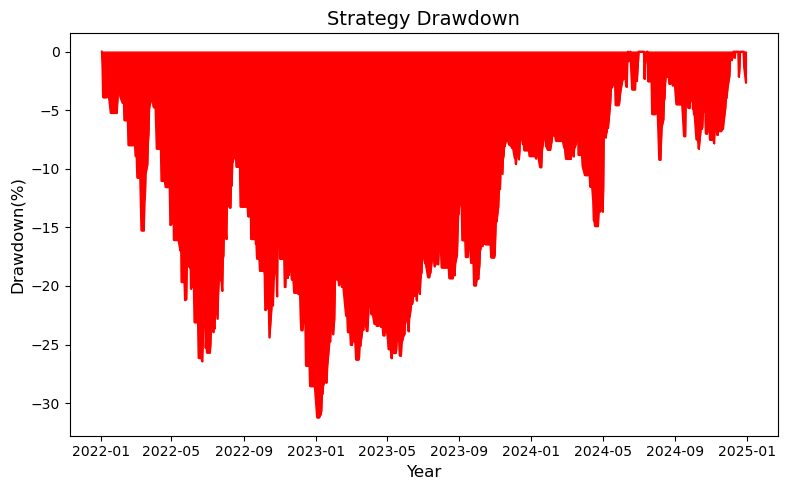

In [57]:
fig = plt.figure(figsize=(8, 5))
plt.plot(drawdown2, color='red')
plt.fill_between(drawdown2.index, drawdown2.values, color='red')
plt.title('Strategy Drawdown', fontsize=14)
plt.ylabel('Drawdown(%)', fontsize=12)
plt.xlabel('Year', fontsize=12)

plt.tight_layout()
plt.show()

In [58]:
# 计算夏普比率（sharp ratio），此处忽略无风险收益率
sharpe_ratio2 = round(strategy_data2['strategy_returns'].mean()/
                     strategy_data2['strategy_returns'].std()*np.sqrt(252*6.5*4), 2)
print("The sharpe ratio is {0: .2f}." .format(sharpe_ratio2))

The sharpe ratio is  1.80.


## 4. Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=5)
model3 = model3.fit(X_train, y_train)

In [60]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model3, out_file=None, filled=True, 
                                feature_names=X_train.columns)

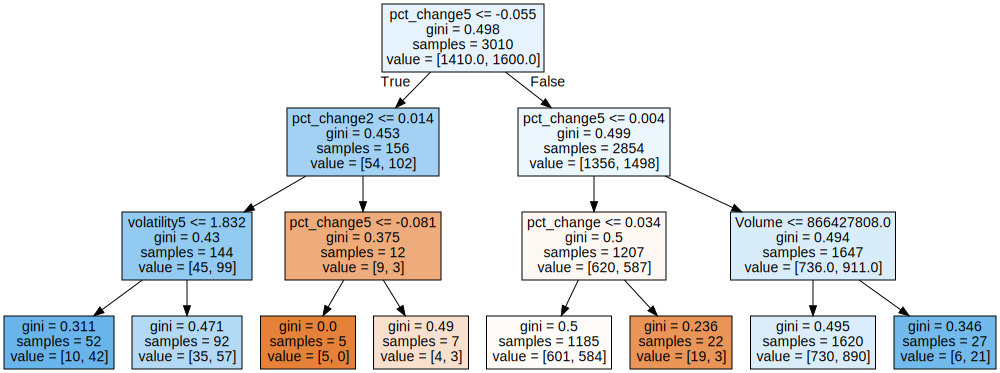

In [61]:
graphviz.Source(dot_data)

In [62]:
y_pred3 = model3.predict(X_test)

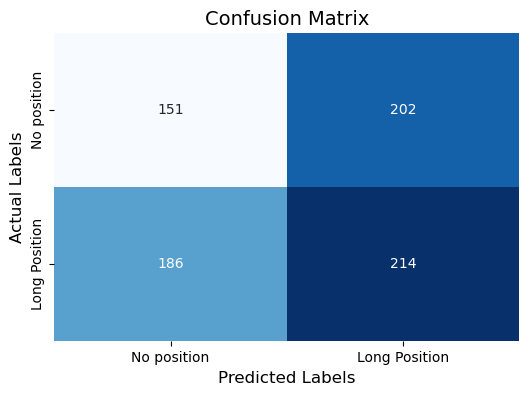

In [63]:
confusion_matrix_data = confusion_matrix(y_test.values, y_pred3)
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(confusion_matrix_data, fmt="d", cmap='Blues', cbar=False, annot=True, ax=ax)
ax.set_xlabel('Predicted Labels', fontsize=12)
ax.set_ylabel('Actual Labels', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)
ax.xaxis.set_ticklabels(['No position', 'Long Position'])
ax.yaxis.set_ticklabels(['No position', 'Long Position'])
plt.show()

In [64]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.45      0.43      0.44       353
           1       0.51      0.54      0.52       400

    accuracy                           0.48       753
   macro avg       0.48      0.48      0.48       753
weighted avg       0.48      0.48      0.48       753



In [65]:
strategy_data3 = X_test[['pct_change']].copy()
strategy_data3['predicted_signal'] = model3.predict(X_test)

# caculate the strategy returns
strategy_data3['strategy_returns'] = strategy_data3['predicted_signal'].shift(1)*\
strategy_data3['pct_change']
strategy_data3.dropna(inplace=True)

# calculate the cumulative returns
strategy_data3['cumulative_returns'] = (1 + strategy_data3['strategy_returns']).cumprod()

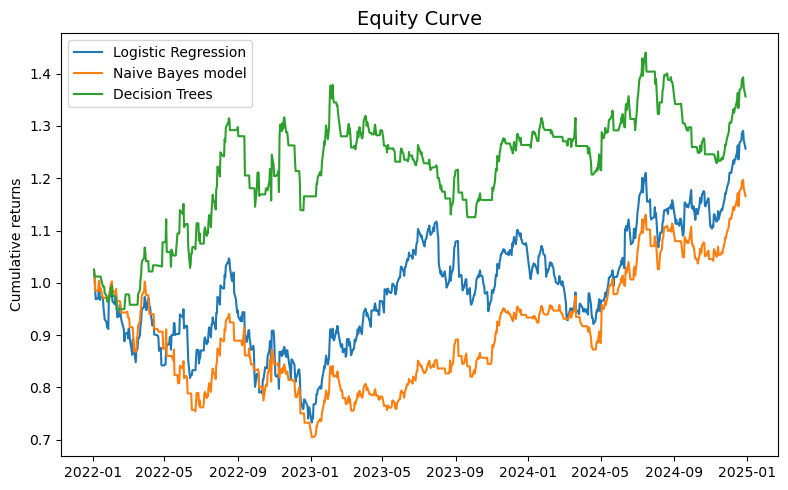

In [66]:
# plot cumulative strategy returns
plt.figure(figsize=(8, 5))
plt.plot(strategy_data['cumulative_returns'], label='Logistic Regression')
plt.plot(strategy_data2['cumulative_returns'], label='Naive Bayes model')
plt.plot(strategy_data3['cumulative_returns'], label='Decision Trees')
plt.title('Equity Curve', fontsize=14)
plt.ylabel('Cumulative returns')
plt.tight_layout()
plt.legend()
plt.show()

In [67]:
# calculate the running maximum
running_max3 = np.maximum.accumulate(strategy_data3['cumulative_returns'].dropna())

# ensure the value never drops below 1
running_max3[running_max3 < 1] = 1

# calculate the precentage drawdown
drawdown3 = ((strategy_data3['cumulative_returns'])/running_max3 -1)*100

# calculate the maximum drawdown
max_dd3 = drawdown3.min()
print("The maximum drawdown is {0: .2f}%." .format(max_dd3))

The maximum drawdown is -18.36%.


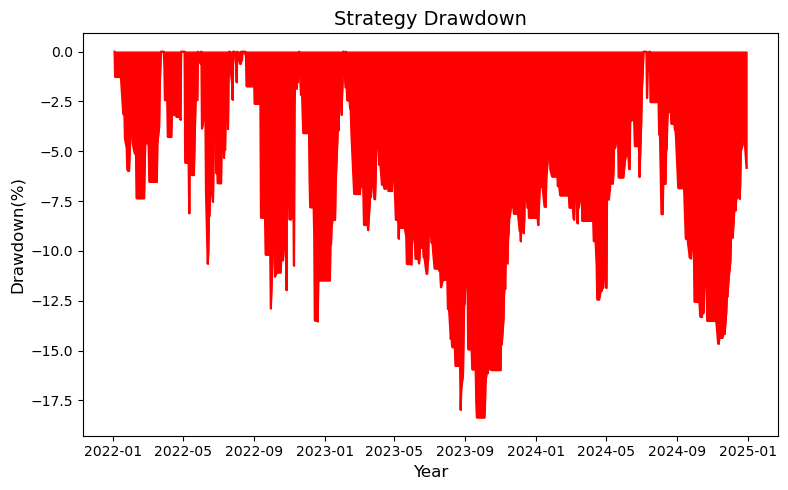

In [68]:
fig = plt.figure(figsize=(8, 5))
plt.plot(drawdown3, color='red')
plt.fill_between(drawdown3.index, drawdown3.values, color='red')
plt.title('Strategy Drawdown', fontsize=14)
plt.ylabel('Drawdown(%)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.tight_layout()
plt.show()

In [69]:
# calculate the sharpe ratio
sharpe_ratio3 = round(strategy_data3['strategy_returns'].mean()/
                     strategy_data3['strategy_returns'].std()*np.sqrt(252*6.5*4), 2)
print("The sharpe ratio is {0: .2f}." .format(sharpe_ratio3))

The sharpe ratio is  3.17.


## 5. Random Forest Algorithm

In [70]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=5, max_depth=3, max_features=3)
model4 = clf.fit(X_train, y_train)

In [71]:
y_pred4 = model4.predict(X_test)

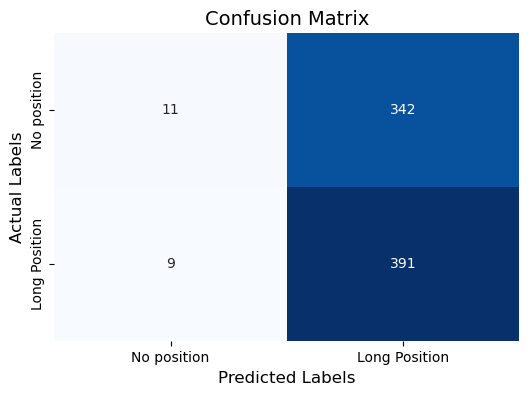

In [72]:
confusion_matrix_data = confusion_matrix(y_test.values, y_pred4)
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(confusion_matrix_data, fmt="d", cmap='Blues', cbar=False, annot=True, ax=ax)
ax.set_xlabel('Predicted Labels', fontsize=12)
ax.set_ylabel('Actual Labels', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)
ax.xaxis.set_ticklabels(['No position', 'Long Position'])
ax.yaxis.set_ticklabels(['No position', 'Long Position'])
plt.show()

In [73]:
classification_report_data = classification_report(y_test, y_pred4)
print(classification_report_data)

              precision    recall  f1-score   support

           0       0.55      0.03      0.06       353
           1       0.53      0.98      0.69       400

    accuracy                           0.53       753
   macro avg       0.54      0.50      0.37       753
weighted avg       0.54      0.53      0.39       753



In [74]:
strategy_data4 = X_test[['pct_change']].copy()
strategy_data4['predicted_signal'] = model4.predict(X_test)

# caculate the strategy returns
strategy_data4['strategy_returns'] = strategy_data4['predicted_signal'].shift(1)*\
strategy_data4['pct_change']
strategy_data4.dropna(inplace=True)

# calculate the cumulative returns
strategy_data4['cumulative_returns'] = (1 + strategy_data4['strategy_returns']).cumprod()

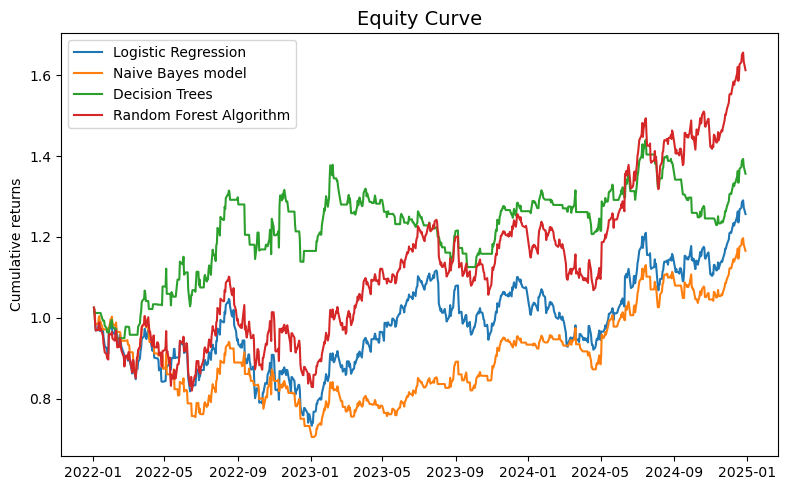

In [75]:
# plot cumulative strategy returns
plt.figure(figsize=(8, 5))
plt.plot(strategy_data['cumulative_returns'], label='Logistic Regression')
plt.plot(strategy_data2['cumulative_returns'], label='Naive Bayes model')
plt.plot(strategy_data3['cumulative_returns'], label='Decision Trees')
plt.plot(strategy_data4['cumulative_returns'], label='Random Forest Algorithm')
plt.title('Equity Curve', fontsize=14)
plt.ylabel('Cumulative returns')
plt.tight_layout()
plt.legend()
plt.show()

In [76]:
# calculate the running maximum
running_max4 = np.maximum.accumulate(strategy_data4['cumulative_returns'].dropna())

# ensure the value never drops below 1
running_max4[running_max4 < 1] = 1

# calculate the precentage drawdown
drawdown4 = ((strategy_data4['cumulative_returns'])/running_max4 -1)*100

# calculate the maximum drawdown
max_dd4 = drawdown4.min()
print("The maximum drawdown is {0: .2f}%." .format(max_dd4))

The maximum drawdown is -24.81%.


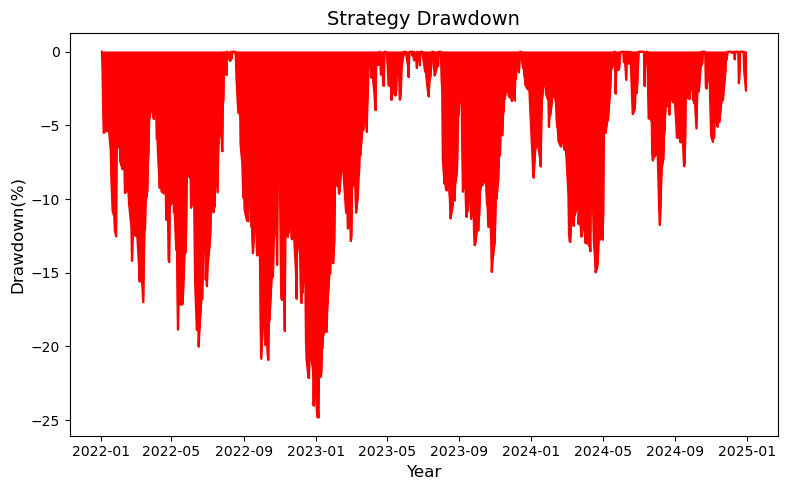

In [77]:
fig = plt.figure(figsize=(8, 5))
plt.plot(drawdown4, color='red')
plt.fill_between(drawdown4.index, drawdown4.values, color='red')
plt.title('Strategy Drawdown', fontsize=14)
plt.ylabel('Drawdown(%)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.tight_layout()
plt.show()

In [78]:
# calculate the sharpe ratio
sharpe_ratio4 = round(strategy_data4['strategy_returns'].mean()/
                     strategy_data4['strategy_returns'].std()*np.sqrt(252*6.5*4), 2)
print("The sharpe ratio is {0: .2f}." .format(sharpe_ratio4))

The sharpe ratio is  3.77.


## 6. Neural Networks

In [79]:
import random
random.seed(42)

In [80]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [81]:
classifier = Sequential()
classifier.add(Dense(units=128, kernel_initializer='uniform', activation='relu',
                     input_dim=X_train_scaled.shape[1]))
classifier.add(Dense(units=128, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [82]:
classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [83]:
classifier.fit(X_train_scaled, y_train, batch_size=20, epochs=7)

Epoch 1/7
151/151 [==============================] - 1s 2ms/step - loss: 0.2495 - accuracy: 0.5229
Epoch 2/7
151/151 [==============================] - 0s 2ms/step - loss: 0.2485 - accuracy: 0.5389
Epoch 3/7
151/151 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.5375
Epoch 4/7
151/151 [==============================] - 0s 2ms/step - loss: 0.2473 - accuracy: 0.5462
Epoch 5/7
151/151 [==============================] - 0s 2ms/step - loss: 0.2468 - accuracy: 0.5508
Epoch 6/7
151/151 [==============================] - 0s 2ms/step - loss: 0.2467 - accuracy: 0.5508
Epoch 7/7
151/151 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.5488


In [84]:
y_pred5 = classifier.predict(X_test_scaled)
y_pred5 = np.where(y_pred5>0.5, 1, 0)

24/24 [==============================] - 0s 1ms/step


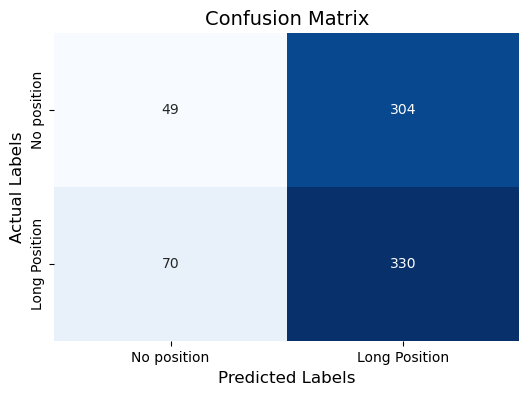

In [85]:
confusion_matrix_data = confusion_matrix(y_test.values, y_pred5)
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(confusion_matrix_data, fmt="d", cmap='Blues', cbar=False, annot=True, ax=ax)
ax.set_xlabel('Predicted Labels', fontsize=12)
ax.set_ylabel('Actual Labels', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)
ax.xaxis.set_ticklabels(['No position', 'Long Position'])
ax.yaxis.set_ticklabels(['No position', 'Long Position'])
plt.show()

In [86]:
classification_report_data = classification_report(y_test, y_pred5)
print(classification_report_data)

              precision    recall  f1-score   support

           0       0.41      0.14      0.21       353
           1       0.52      0.82      0.64       400

    accuracy                           0.50       753
   macro avg       0.47      0.48      0.42       753
weighted avg       0.47      0.50      0.44       753



In [87]:
strategy_data5 = X_test[['pct_change']].copy()
strategy_data5['predicted_signal'] = y_pred5

# caculate the strategy returns
strategy_data5['strategy_returns'] = strategy_data5['predicted_signal'].shift(1)*\
strategy_data5['pct_change']
strategy_data5.dropna(inplace=True)

# calculate the cumulative returns
strategy_data5['cumulative_returns'] = (1 + strategy_data5['strategy_returns']).cumprod()

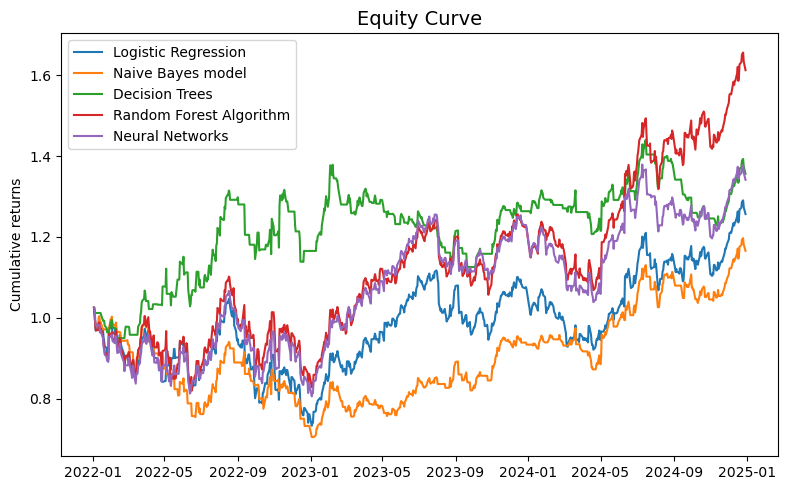

In [88]:
# plot cumulative strategy returns
plt.figure(figsize=(8, 5))
plt.plot(strategy_data['cumulative_returns'], label='Logistic Regression')
plt.plot(strategy_data2['cumulative_returns'], label='Naive Bayes model')
plt.plot(strategy_data3['cumulative_returns'], label='Decision Trees')
plt.plot(strategy_data4['cumulative_returns'], label='Random Forest Algorithm')
plt.plot(strategy_data5['cumulative_returns'], label='Neural Networks')
plt.title('Equity Curve', fontsize=14)
plt.ylabel('Cumulative returns')
plt.tight_layout()
plt.legend()
plt.show()

In [89]:
# calculate the running maximum
running_max5 = np.maximum.accumulate(strategy_data5['cumulative_returns'].dropna())

# ensure the value never drops below 1
running_max5[running_max5 < 1] = 1

# calculate the precentage drawdown
drawdown5 = ((strategy_data5['cumulative_returns'])/running_max5 -1)*100

# calculate the maximum drawdown
max_dd5 = drawdown5.min()
print("The maximum drawdown is {0: .2f}%." .format(max_dd5))

The maximum drawdown is -24.47%.


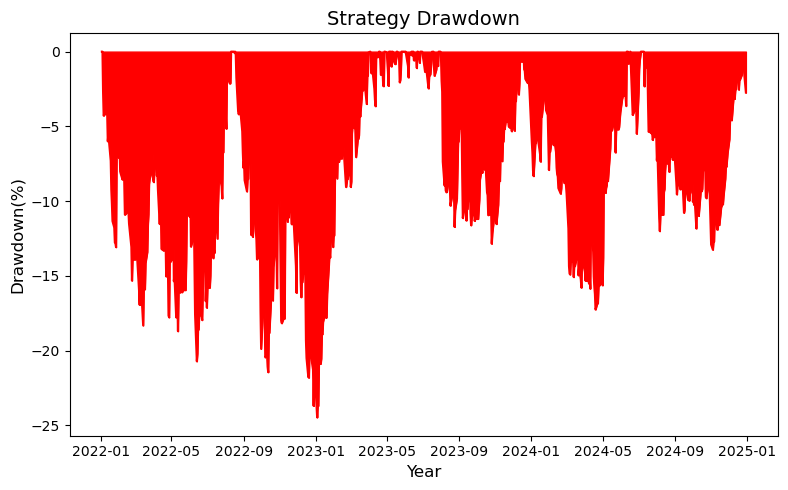

In [90]:
fig = plt.figure(figsize=(8, 5))
plt.plot(drawdown5, color='red')
plt.fill_between(drawdown5.index, drawdown5.values, color='red')
plt.title('Strategy Drawdown', fontsize=14)
plt.ylabel('Drawdown(%)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.tight_layout()
plt.show()

In [91]:
# calculate the sharpe ratio
sharpe_ratio5 = round(strategy_data5['strategy_returns'].mean()/
                     strategy_data5['strategy_returns'].std()*np.sqrt(252*6.5*4), 2)
print("The sharpe ratio is {0: .2f}." .format(sharpe_ratio5))

The sharpe ratio is  2.65.


## 7. 结论

基于对苹果公司股票涨跌预测的多个机器学习模型（逻辑回归、朴素贝叶斯、决策树、随机森林和神经网络）进行回测的结果，以下是一些主要结论：  

**预测性能方面：**

逻辑回归模型在精度和召回率之间取得了较好的平衡，尤其是在多头头寸预测（1类）的召回率（88%）上表现突出，尽管总体准确率为51%，模型倾向于正确识别多头信号。

朴素贝叶斯模型在整体精度上与逻辑回归相当，但回撤的幅度稍大（最大回撤为-31.22%）。该模型在1类的召回率（68%）上同样有较好表现，但其F1分数较低，表明它在实际应用中可能面临一定的误报。  

决策树模型的准确率为48%，表现相对较差。它在1类（多头信号）上的召回率（54%）和F1得分（52%）表现一般，且在回测中表现出的最大回撤（-18.36%）较小，但Sharpe比率较高（3.17），表明其风险调整后的回报较好。

随机森林模型表现较为不稳定，尽管准确率为53%，但其最大回撤仍然较高（-24.81%），并且F1分数较低，特别是对于0类（空头信号）的召回率较差。它的Sharpe比率为3.77，表明在风险控制上相对较好，但整体效果依赖于大量随机性的特征选择。

神经网络模型与其他模型相比，在准确率和召回率上的表现都比较一般，最大回撤（-24.47%）虽然较小，但Sharpe比率（2.65）显示出较好的风险调整表现。

**最大回撤和风险：**

各个模型的最大回撤都集中在2023年1月和2月，表明该时期的股市波动较大，可能与全球宏观经济环境、通胀压力以及苹果公司内部的供应链问题等因素相关。

逻辑回归模型在所有模型中具有最低的最大回撤（-29.99%），虽然它的Sharpe比率（2.20）较高，但依然显示出较大的风险波动。

其他模型（尤其是朴素贝叶斯和随机森林）的最大回撤较大，进一步验证了其策略在面对极端市场条件时可能会经历较大的亏损。

**总结：**

逻辑回归和神经网络模型在多头预测上的表现较好，但在整体回测中，都面临较大的波动性和较低的精度表现。

决策树和随机森林模型在回撤和风险管理方面表现较为优异，尽管预测精度较低。

总体而言，预测苹果股票涨跌的策略在2023年初的市场波动下，面临较大的回撤风险，这也表明市场环境对模型的稳健性产生了重要影响。

通过这些分析，可以进一步调整交易策略，改善风险管理和精度，同时考虑到经济环境和市场条件的影响，可能需要更多的特征工程和模型调优来提高效果。